In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/AnalisisImagenes/2_2_SegmentacionDeImagenes')

## Paquetes Necesarios

In [0]:
%matplotlib inline
import cv2
import numpy as np
import skimage
from skimage import segmentation
from matplotlib import pyplot as plt

## Threshold Segmentation

In [0]:
img1 = skimage.data.page()

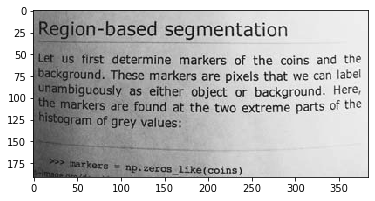

In [0]:
plt.imshow(img1, cmap='gray')
plt.show()

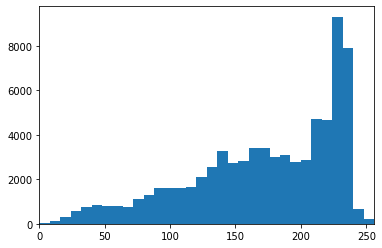

In [0]:
fig, ax = plt.subplots(1, 1)
ax.hist(img1.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [0]:
img1_segmented1 = img1 > 50
img1_segmented2 = img1 > 70
img1_segmented3 = img1 > 120

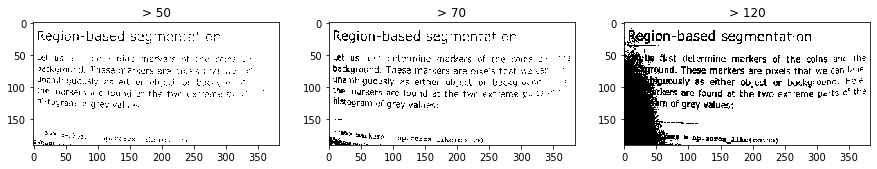

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].imshow(img1_segmented1, cmap='gray')
ax[1].imshow(img1_segmented2, cmap='gray')
ax[2].imshow(img1_segmented3, cmap='gray')

ax[0].set_title('> 50')
ax[1].set_title('> 70')
ax[2].set_title('> 120')

plt.show()

In [0]:
unsupervisedthreshold = skimage.filters.threshold_local(img1, block_size=51, offset=10)
img1_unsupervisedthreshold = img1 > unsupervisedthreshold

## Unsupervised Threshold Segmentation

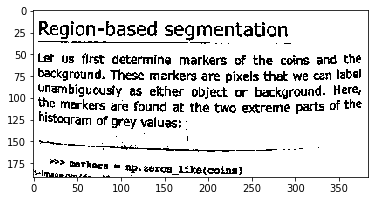

In [0]:
plt.imshow(img1_unsupervisedthreshold, cmap='gray')
plt.show()

## Active Contour Segmentation

In [0]:
img2 = cv2.imread('images/terry.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

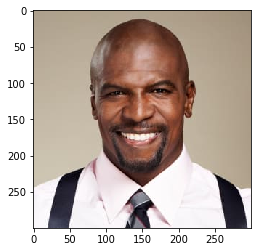

In [0]:
plt.imshow(img2)
plt.show()

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [0]:
# points = circle_points(200, [135, 325], 120)[:-1]
points = circle_points(150, [120, 150], 120)[:-1]

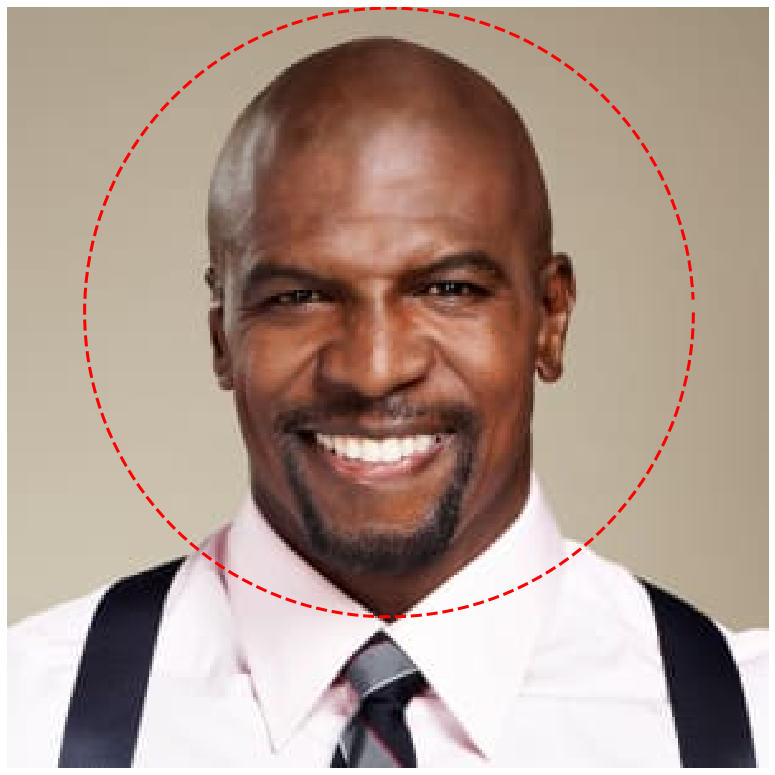

In [0]:
fig, ax = image_show(img2)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

In [0]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
snake = segmentation.active_contour(img2_gray, points)

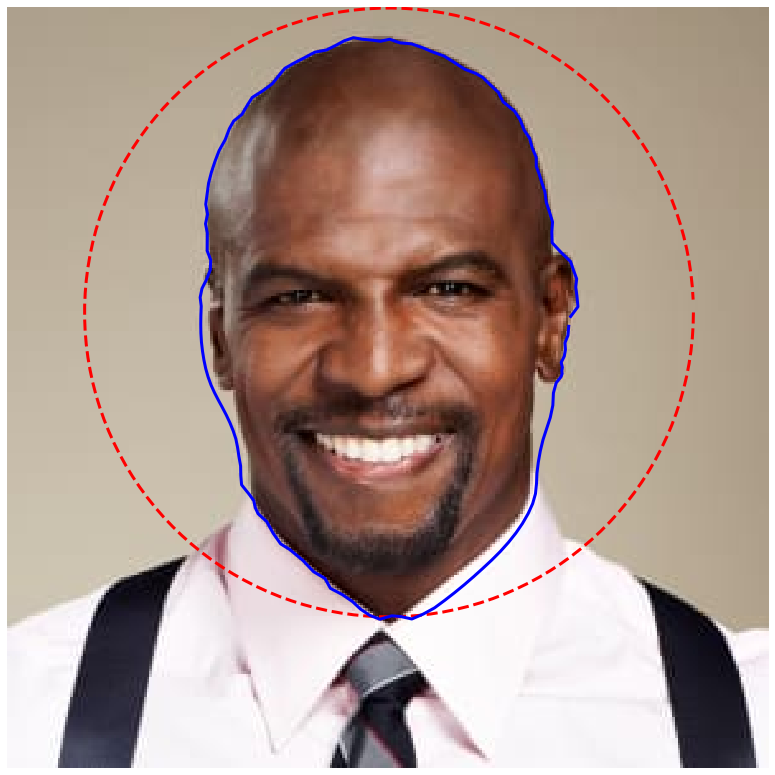

In [0]:
fig, ax = image_show(img2)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

## SLIC (Simple Linear Iterative Clustering)

In [0]:
image_slic_20 = segmentation.slic(img2, n_segments=20)
image_slic_60 = segmentation.slic(img2, n_segments=60)
image_slic_150 = segmentation.slic(img2, n_segments=150)

img2_20seg = skimage.color.label2rgb(image_slic_20, img2, kind='avg')
img2_60seg = skimage.color.label2rgb(image_slic_60, img2, kind='avg')
img2_150seg = skimage.color.label2rgb(image_slic_150, img2, kind='avg')

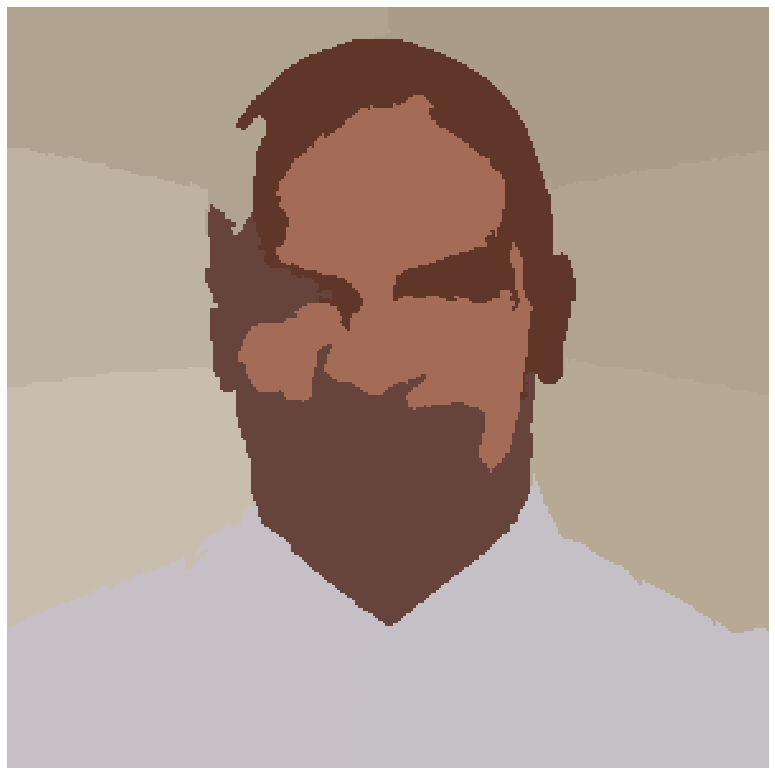

In [0]:
image_show(img2_20seg)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x297e9519988>)

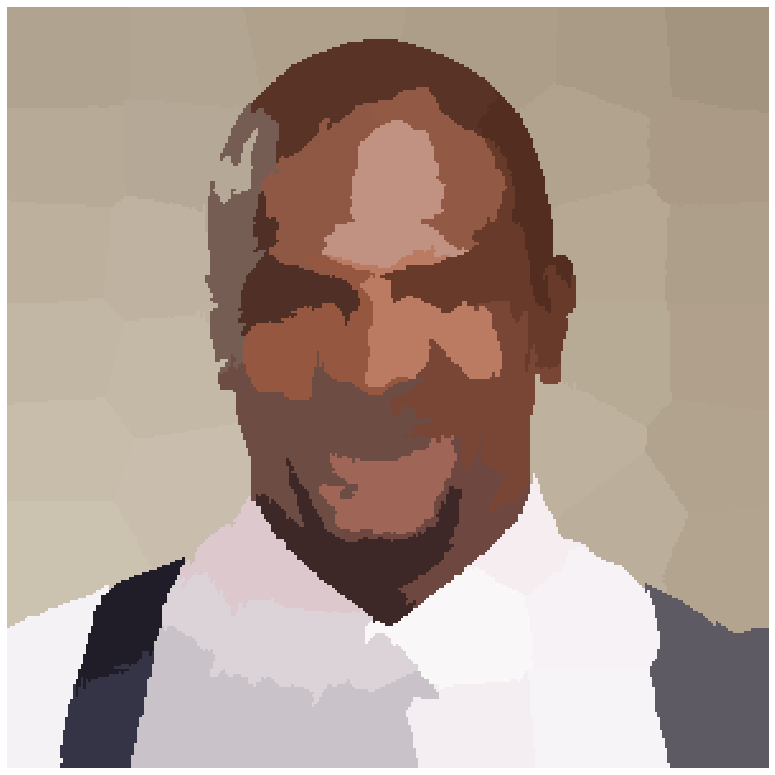

In [0]:
image_show(img2_60seg)

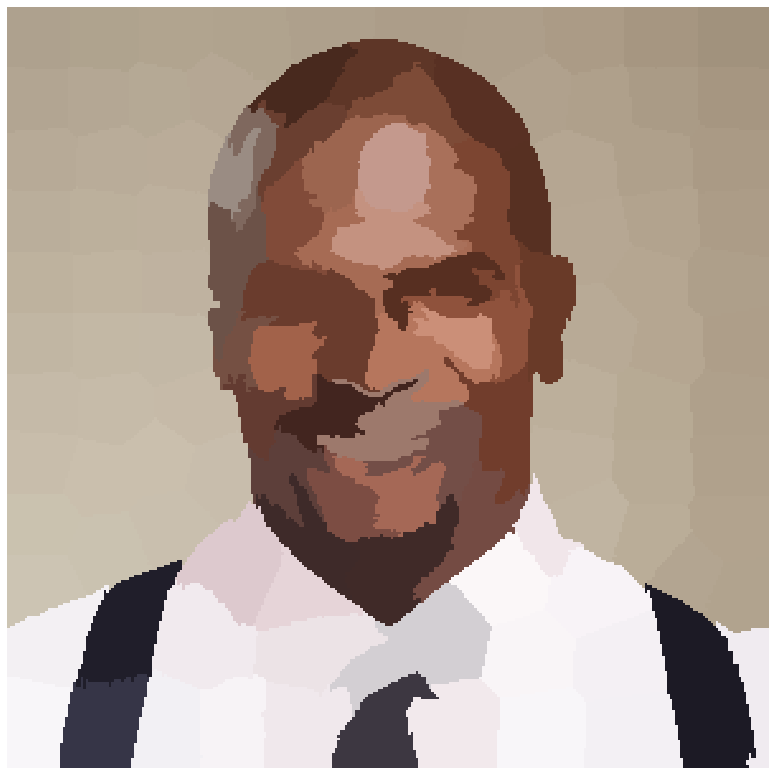

In [0]:
image_show(img2_150seg);

## Felzenszwalb

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x297e9385c48>)

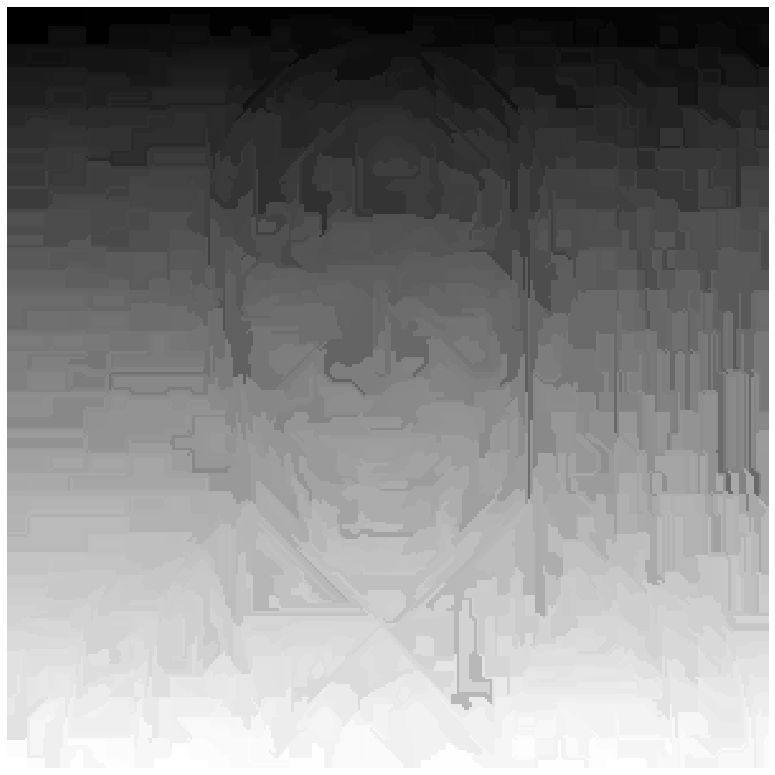

In [0]:
img_felzenszwalb = segmentation.felzenszwalb(img2) 
image_show(img_felzenszwalb)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x297e975f0c8>)

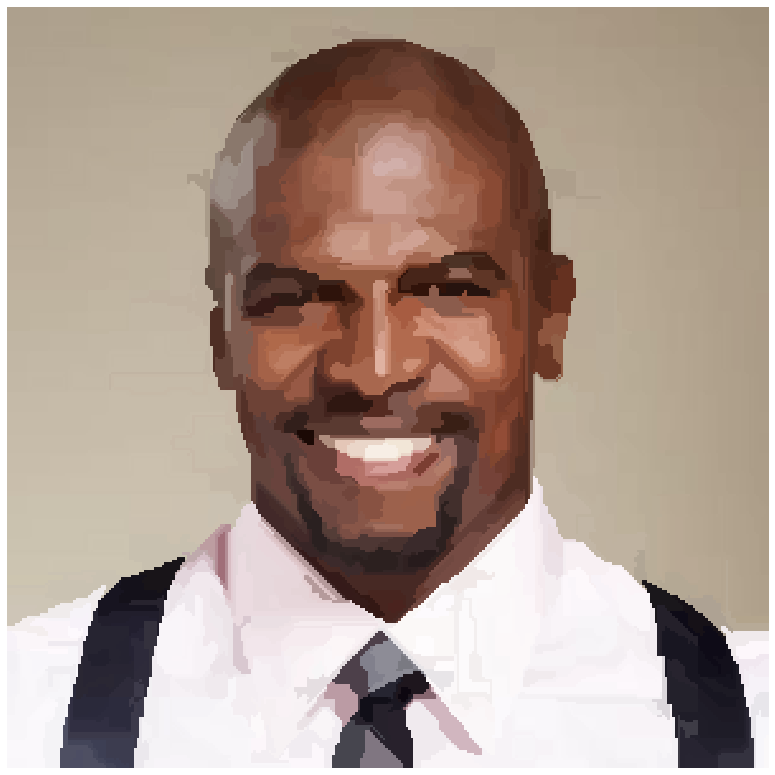

In [0]:
img_felzenszwalb_colored = skimage.color.label2rgb(img_felzenszwalb, img2, kind='avg')
image_show(img_felzenszwalb_colored)